### MALL CUSTOMERS CLUSTERING

In [2]:
#Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Mall_Customers.csv')

In [4]:
#FIRST 5 ROWS
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
#STATISTICAL INFORMATION
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#null values
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.drop(columns = ['CustomerID'],inplace = True)

In [11]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [12]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [13]:
def zeroone(x):
    if x == 'Male':
        return 0
    else:
        return 1

In [14]:
df['Genre'] = df['Genre'].apply(zeroone)

In [15]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


### DATA VISUALIZATION

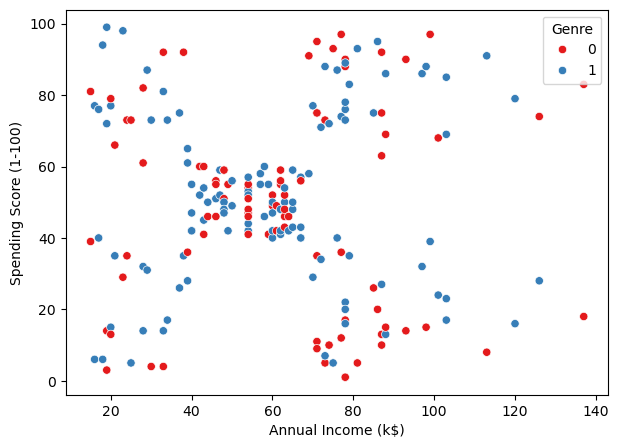

In [17]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df,hue = 'Genre', palette = 'Set1')
plt.show()

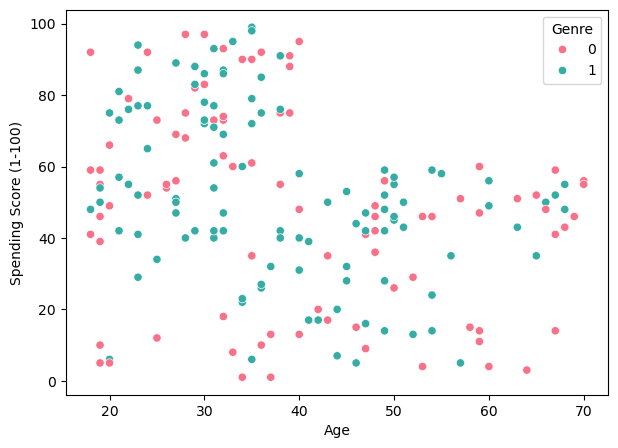

In [18]:
plt.figure(figsize = (7,5))
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = df, hue = 'Genre', palette = 'husl')
plt.show()

### Create a K-Means Clustering Model

In [20]:
from sklearn.cluster import KMeans

In [21]:
model = KMeans(n_clusters = 3)

### Fit and Predict Clusters

In [62]:
clusters = model.fit_predict(df)
clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [64]:
df['Clusters'] = clusters

In [66]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,0,19,15,39,0
1,0,21,15,81,1
2,1,20,16,6,0
3,1,23,16,77,1
4,1,31,17,40,0


In [68]:
df['Clusters'].unique()

array([0, 1, 2])

### Assign each cluster to a new Dataframe

In [71]:
df0 = df[df['Clusters'] == 0]
df1 = df[df['Clusters'] == 1]
df2 = df[df['Clusters'] == 2]

### Visualizing the clusters

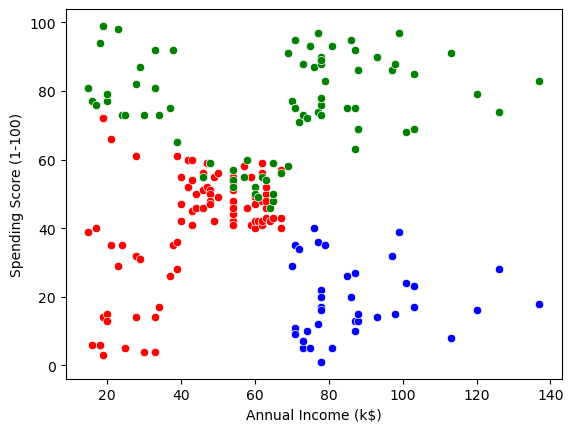

In [74]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df0, color = 'red')
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df1, color = 'green')
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = df2, color = 'blue')
plt.show()